Project code for Kaggle House-Prices: Advanced Regression Techniques  
DSA Project #3 - Machine Learning    
Erin Dugan, Aug 2018  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

***SET UP PYTHON LIBRARIES:***
---------------------------

In [535]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from xgboost import XGBRegressor
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



pd.set_option('max_columns',100)  # To show 100 columns of a dataframe
%matplotlib inline 
plt.rcParams['figure.figsize'] = (30,30)   # To display larger plots

***LOAD DATA:***
-----------------
Load House Price Data from Kaggle into dataframes:

In [536]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
df_train.shape

(1460, 81)

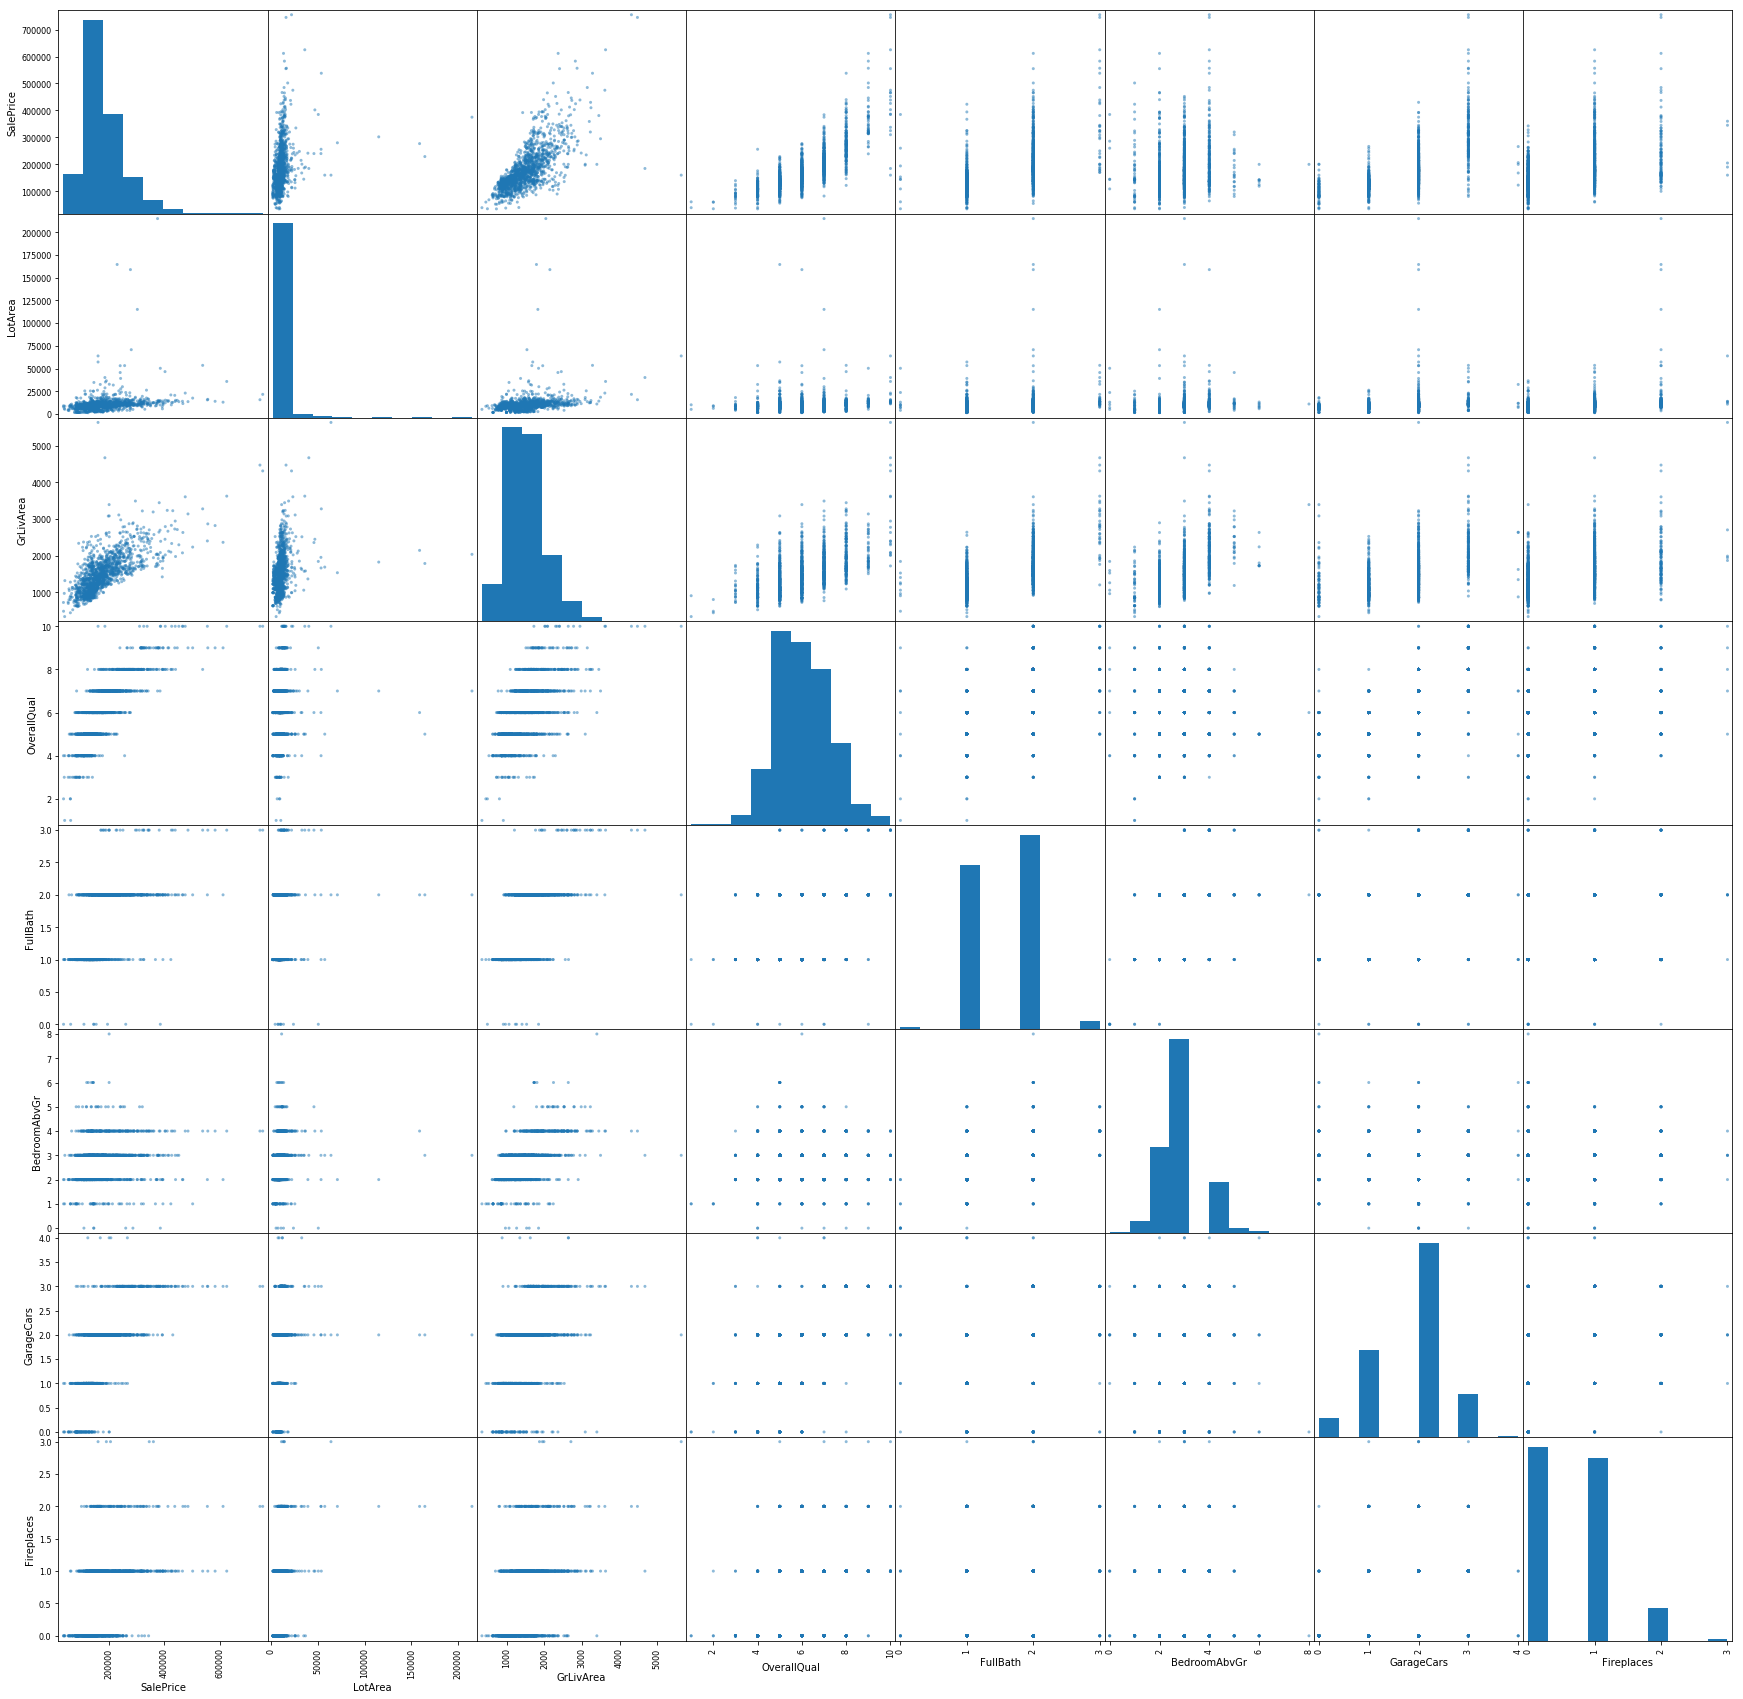

In [537]:
scatter_matrix(df_train[['SalePrice','LotArea','GrLivArea','OverallQual','FullBath','BedroomAbvGr','GarageCars',\
                        'Fireplaces']])
plt.show()

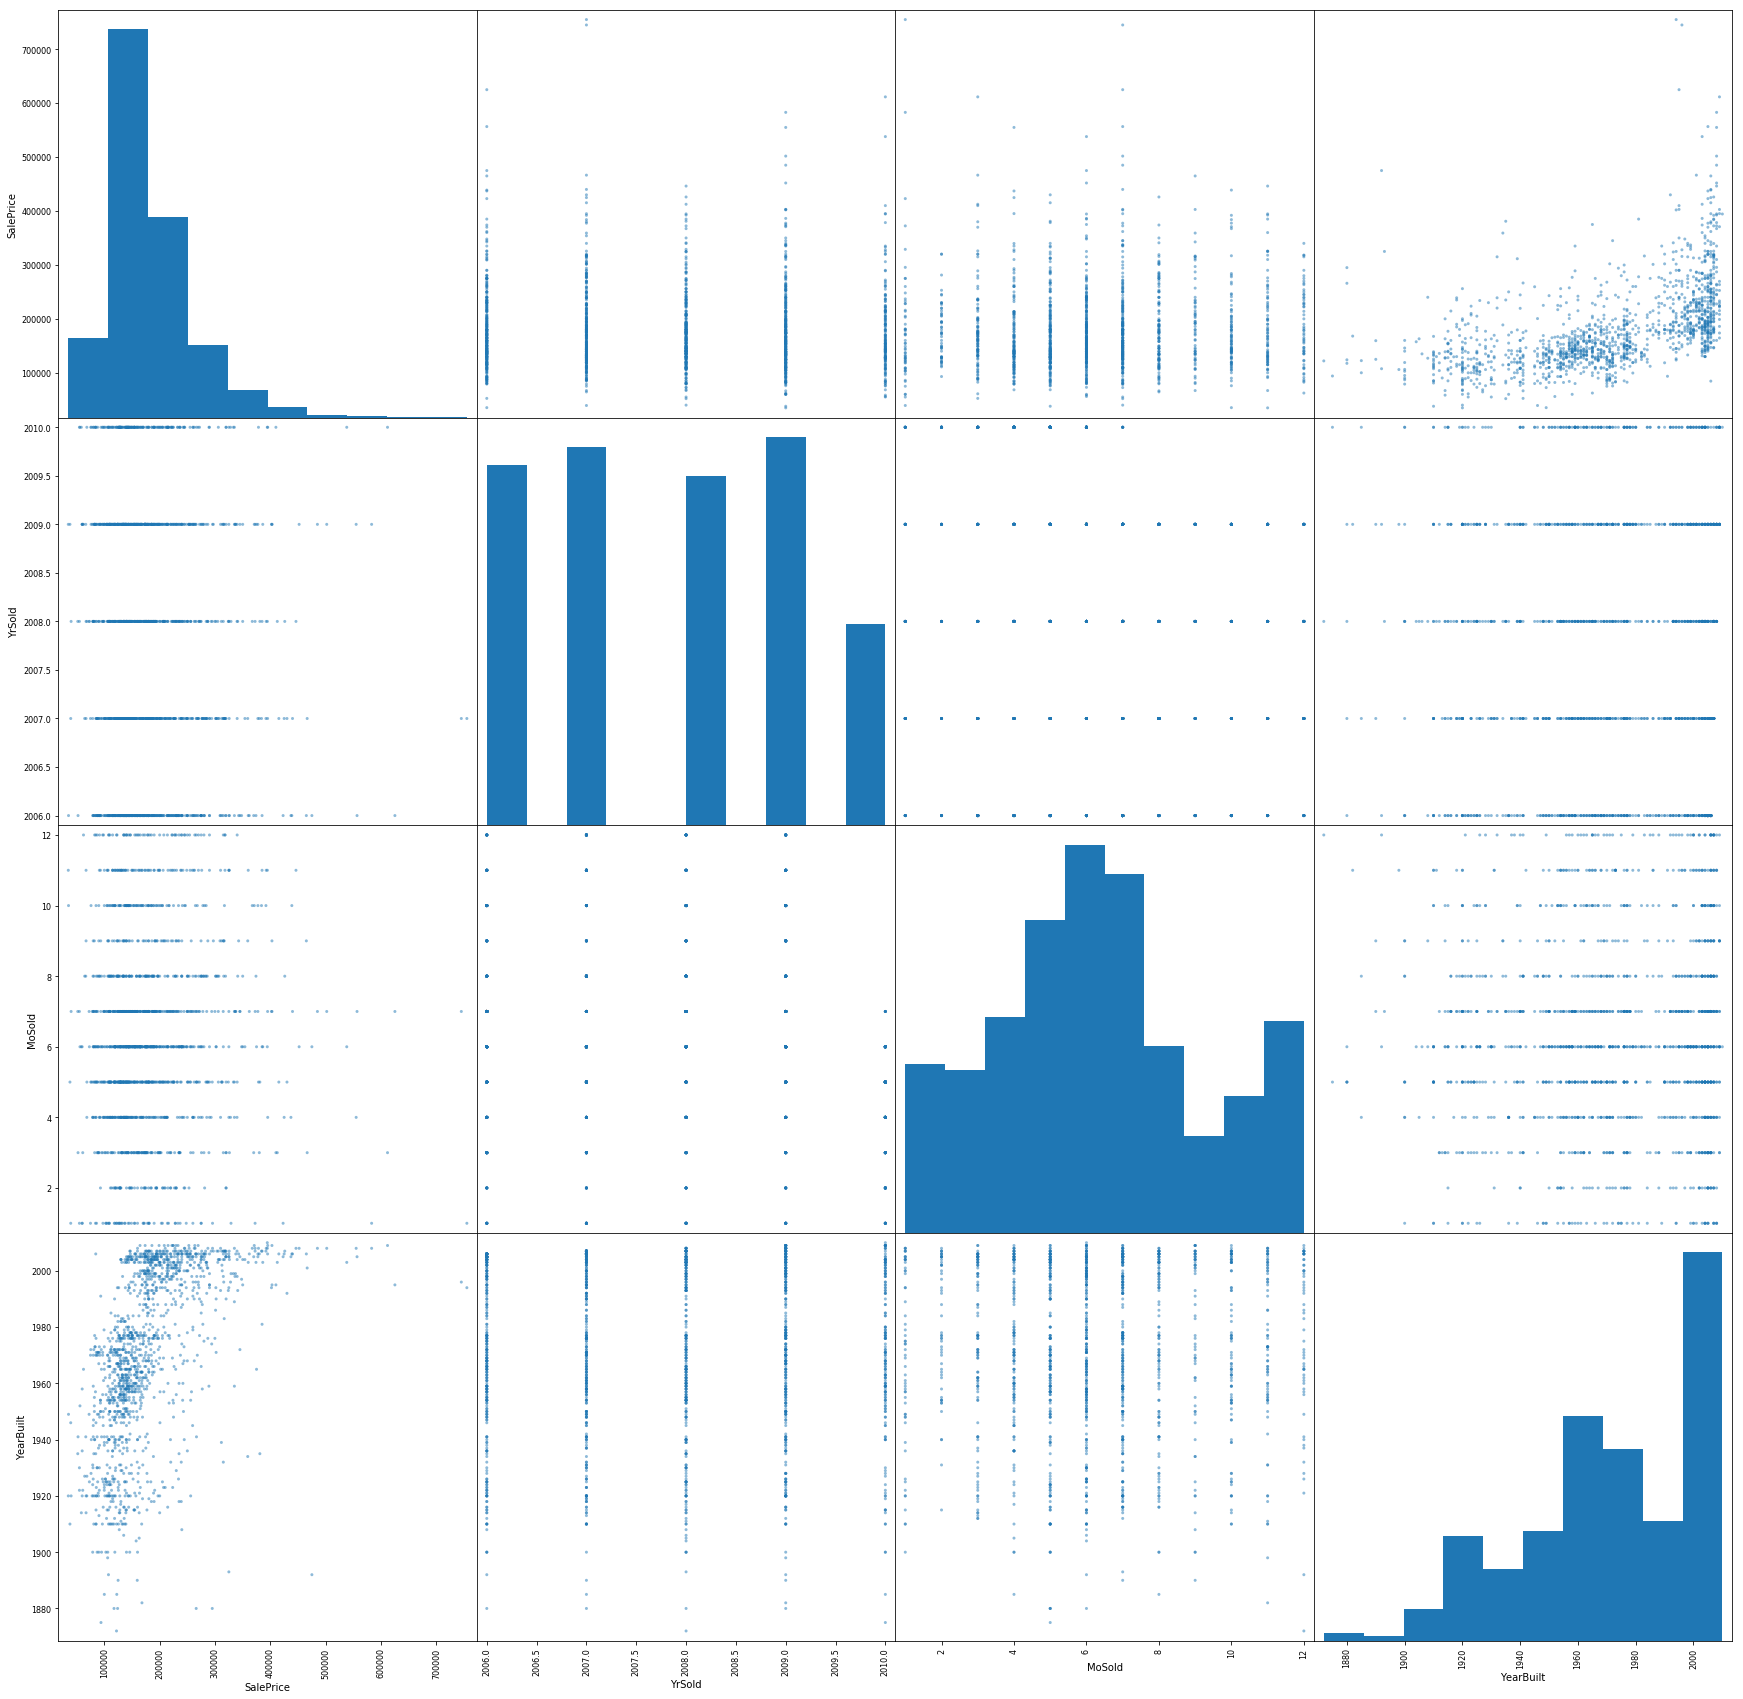

In [538]:
scatter_matrix(df_train[['SalePrice','YrSold','MoSold','YearBuilt']])
plt.show()

***DATA SUMMARY:***
--------------------------

Check both test & train data sets together:

In [539]:
print(df_train.shape)
print(df_test.shape)
print(df_train.shape)
all_data = pd.concat([df_train, df_test], ignore_index=True)
print(all_data.shape)
all_data.describe()

(1460, 81)
(1459, 80)
(1460, 81)
(2919, 81)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


Look for NA's in data set:

In [540]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)[:20])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


Check categorical variable details:

In [541]:
categoricals = all_data.select_dtypes(exclude=[np.number])
categoricals.describe()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,198,2919,2837,2837,2840,2839,2838,2919,2919,2919,2918,2919,2919,2918,2918,571,1499,2919,2917,2760,2760,2760,2762,2919,2919,2919,2918,2919,2919,2919,2919,2915,2895,105,2919,2919,10,2919,2919,2919,2918,2919,2917
unique,2,5,4,4,6,6,4,2,9,8,5,5,4,15,16,4,5,6,7,5,3,5,6,6,5,8,4,4,3,5,4,5,4,4,25,3,3,8,6,6,9,2,2
top,Grvl,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,Unf,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,Inside,Reg,RL,None,Shed,NAmes,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
freq,120,2425,2606,1904,851,2493,1283,2723,2511,2889,2671,2538,1798,1025,1014,329,744,1308,2717,2654,1230,2604,1723,2874,1493,1471,1492,2622,2778,2133,1859,2265,1742,95,443,2641,4,2876,2310,2402,2525,2907,2916


***DATA VISUALIZATION:***
------------------------

Graphs for categorical variables:
* Boxplots vs. SalePrice  --> to show influence on SalePrice
* Density plots vs. SalePrice (compare Neighborhoods? other categories)


Graphs for numerical variables:
1. scatter plots vs. SalePrice  --> remove outliers?
2. histograms --> check skewness (then do Box-Cox transform?)

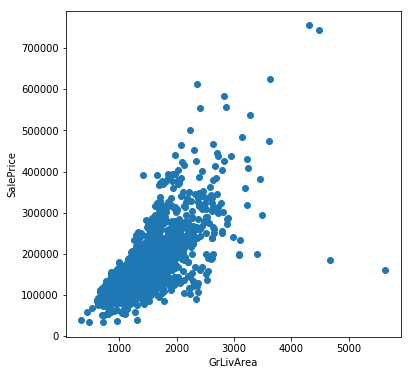

In [542]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['GrLivArea'], y = all_data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
fig.set_size_inches(6,6)
plt.show()

In [543]:
#Remove two outliers on lower-right:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)


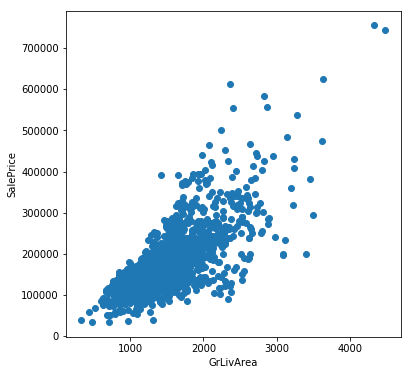

In [545]:
#Check results
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
fig.set_size_inches(6,6)
plt.show()

In [547]:
y_train = df_train[['SalePrice']]
X_train = df_train.drop(['SalePrice','Id'], axis=1)
X_test = df_test.drop(['Id'], axis=1)

In [550]:
X_train.shape

(1458, 79)

***CLEAN DATA SET:***  
--------------------
Clean up categorical variables, remove NA's:

In [551]:

for col in ('GarageFinish','GarageQual','GarageCond','PoolQC','MiscFeature','FireplaceQu','BsmtQual', \
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType', 'Alley','Fence',\
           'GarageType'):
    X_train[col] = X_train[col].fillna('None')
    
for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    X_train[col] = X_train[col].fillna(0)
    
X_train['MSZoning'] = X_train['MSZoning'].fillna(X_train['MSZoning'].mode()[0])

X_train["Functional"] = X_train["Functional"].fillna("Typ")

X_train['Electrical'] = X_train['Electrical'].fillna(X_train['Electrical'].mode()[0])
X_train['KitchenQual'] = X_train['KitchenQual'].fillna(X_train['KitchenQual'].mode()[0])
X_train['Exterior1st'] = X_train['Exterior1st'].fillna(X_train['Exterior1st'].mode()[0])
X_train['Exterior2nd'] = X_train['Exterior2nd'].fillna(X_train['Exterior2nd'].mode()[0])
X_train['SaleType'] = X_train['SaleType'].fillna(X_train['SaleType'].mode()[0])
X_train['MSSubClass'] = X_train['MSSubClass'].fillna("None")


In [552]:
#Drop features having few data points:
X_train = X_train.drop(['Utilities','PoolQC','MiscFeature','FireplaceQu','Fence'], axis=1)


In [553]:
#MSSubClass=The building class
X_train['MSSubClass'] = X_train['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
X_train['OverallCond'] = X_train['OverallCond'].astype(str)

Impute NA's in numerical data:

In [554]:
X_train["LotFrontage"] = X_train.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))
X_train['MasVnrArea'] = X_train.MasVnrArea.fillna(0)
#Garage yr built --> NA=no garage (dropped later because of high correlation with YrBuilt)


In [555]:
Nnulls = pd.DataFrame(X_train.isnull().sum().sort_values(ascending=False)[:20])
Nnulls.columns = ['Null Count']
Nnulls.index.name = 'Feature'
Nnulls  #Verify no NA's in numeric & categorical columns


,Null Count
Feature,
SaleCondition,0
YearRemodAdd,0
RoofMatl,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
MasVnrArea,0
ExterQual,0
ExterCond,0


Check for skewness in data:

***FEATURE SELECTION:***
----------------------
Evaluate correlation of numerical variables:

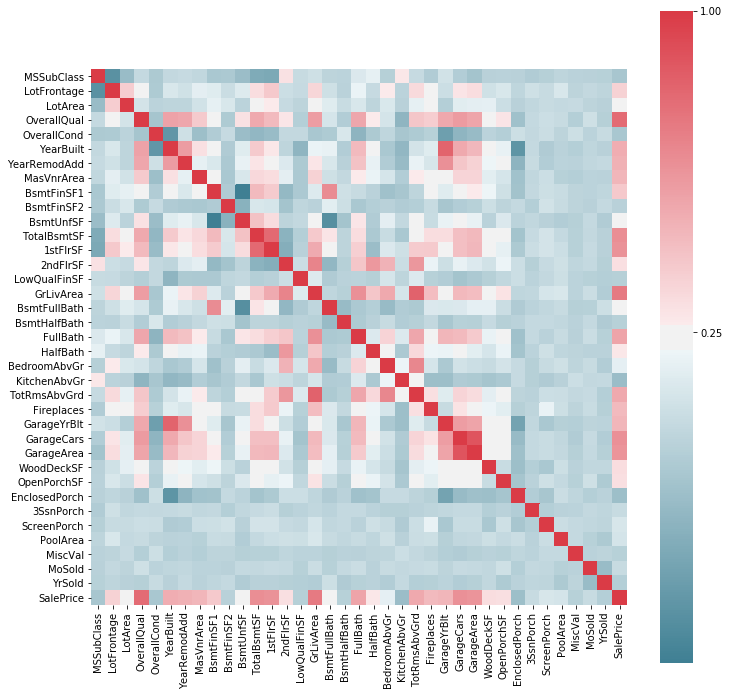

In [557]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:80].corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)

Heatmap shows correlations between numerical features: 
* YearBuilt & GarageYrBlt,GarageCars,GarageArea  
* OverallQual & GarageYrBlt,GarageCars,GarageArea  
* LotArea & Lot Frontage  
* GrLivArea & TotRmsAbvGrd  
* FullBath & GrLivArea  
* TotRmsAbvGrd & BedroomAbvGr  
* GarageYrBlt & Garage Cars, GarageArea  
* YearBuilt & YrRemodAdd  


  

Features' correlation with Sale Price:

In [558]:
abs(df_train.corr()['SalePrice'].sort_values(ascending = False)).head(15)

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
YearRemodAdd    0.507717
GarageYrBlt     0.487156
MasVnrArea      0.482719
Fireplaces      0.469862
BsmtFinSF1      0.409384
Name: SalePrice, dtype: float64

Convert numerical variables to categorical:

In [559]:
X_train["MoSold"] = X_train["MoSold"].astype('category')
X_test["MoSold"] = X_test["MoSold"].astype('category')

X_train["YrSold"] = X_train["MoSold"].astype('category')
X_test["YrSold"] = X_test["MoSold"].astype('category')

In [560]:
#Fireplace, Pool, Deck, Porch -- switch to category?
X_train["Fireplaces"] = X_train["Fireplaces"].astype('category')
X_train["OverallCond"] = X_train["OverallCond"].astype('category')
X_train["MSSubClass"] = X_train["MSSubClass"].astype('category')
X_train["OverallQual"] = X_train["OverallQual"].astype('category')

In [561]:
np.var(X_train, 0).map('{:.2f}'.format).sort_values().head(15)

KitchenAbvGr         0.05
BsmtHalfBath         0.06
HalfBath             0.25
BsmtFullBath         0.27
FullBath             0.30
GarageCars           0.56
BedroomAbvGr         0.67
1stFlrSF        138318.45
PoolArea          1459.00
WoodDeckSF       15701.85
TotalBsmtSF     172092.21
BsmtFinSF1      187333.66
2ndFlrSF        189463.96
BsmtUnfSF       195307.03
TotRmsAbvGrd         2.61
dtype: object

In [562]:
#Drop features with variance < 0.30:  (Not convinced Baths & Fireplaces are not influencing SalePrice yet)
X_train = X_train.drop(['BsmtFullBath','BsmtHalfBath','KitchenAbvGr'], axis=1)


### Label Encoding - for categorical features with ordered values:


In [563]:
X_train['GarageCond'] = X_train['GarageCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
X_train['GarageQual'] = X_train['GarageQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
X_train['BsmtQual'] = X_train['BsmtQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
X_train['BsmtCond'] = X_train['BsmtCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None':0})
X_train['KitchenQual'] = X_train['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_train['ExterQual'] = X_train['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_train['ExterCond'] = X_train['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
X_train['HeatingQC'] = X_train['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})


In [564]:
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,"NA":0,'None':0})
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,"NA":0,'None':0})
X_train['Functional'] = X_train['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,"Sal":0})
X_train['BsmtExposure'] = X_train['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,"NA":0, 'None':0})
X_train['GarageFinish'] = X_train['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,"None":0,"NA":0})
X_train['LandSlope'] = X_train['LandSlope'].map({'Gtl':2,'Mod':1,"Sev":0})
X_train['LotShape'] = X_train['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,"IR3":0})
X_train['PavedDrive'] = X_train['PavedDrive'].map({'Y':2,'P':1,"N":0})
X_train['CentralAir'] = X_train['CentralAir'].map({'Y': 1,'N': 0})


In [565]:
le_cols = ('GarageCond','GarageQual','BsmtQual','BsmtCond','KitchenQual','ExterQual','ExterCond','HeatingQC',\
           'BsmtFinType1','BsmtFinType2','Functional','BsmtExposure','GarageFinish','LandSlope','LotShape',\
           'PavedDrive','CentralAir')

for feat in le_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X_train[feat].values)) 
    X_train[feat] = lbl.transform(list(X_train[feat].values))

# shape        
print('Shape X_train: {}'.format(X_train.shape))

Shape X_train: (1458, 71)


In [566]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,3,Lvl,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,2,PConc,3,2,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,2,1,3,2,8,6,0,Attchd,2003.0,2,2,548,2,2,2,0,61,0,0,0,0,0,2,2,WD,Normal
1,20,RL,80.0,9600,Pave,None,3,Lvl,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,1,2,CBlock,3,2,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,2,0,3,1,6,6,1,Attchd,1976.0,2,2,460,2,2,2,298,0,0,0,0,0,0,5,5,WD,Normal
2,60,RL,68.0,11250,Pave,None,2,Lvl,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,2,PConc,3,2,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,2,1,3,2,6,6,1,Attchd,2001.0,2,2,608,2,2,2,0,42,0,0,0,0,0,9,9,WD,Normal
3,70,RL,60.0,9550,Pave,None,2,Lvl,Corner,2,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,1,2,BrkTil,2,3,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,3,2,7,6,1,Detchd,1998.0,1,3,642,2,2,2,0,35,272,0,0,0,0,2,2,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,2,Lvl,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,2,PConc,3,2,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,2,1,4,2,9,6,1,Attchd,2000.0,2,3,836,2,2,2,192,84,0,0,0,0,0,12,12,WD,Normal


***FEATURE IMPORTANCE:***
------------------------

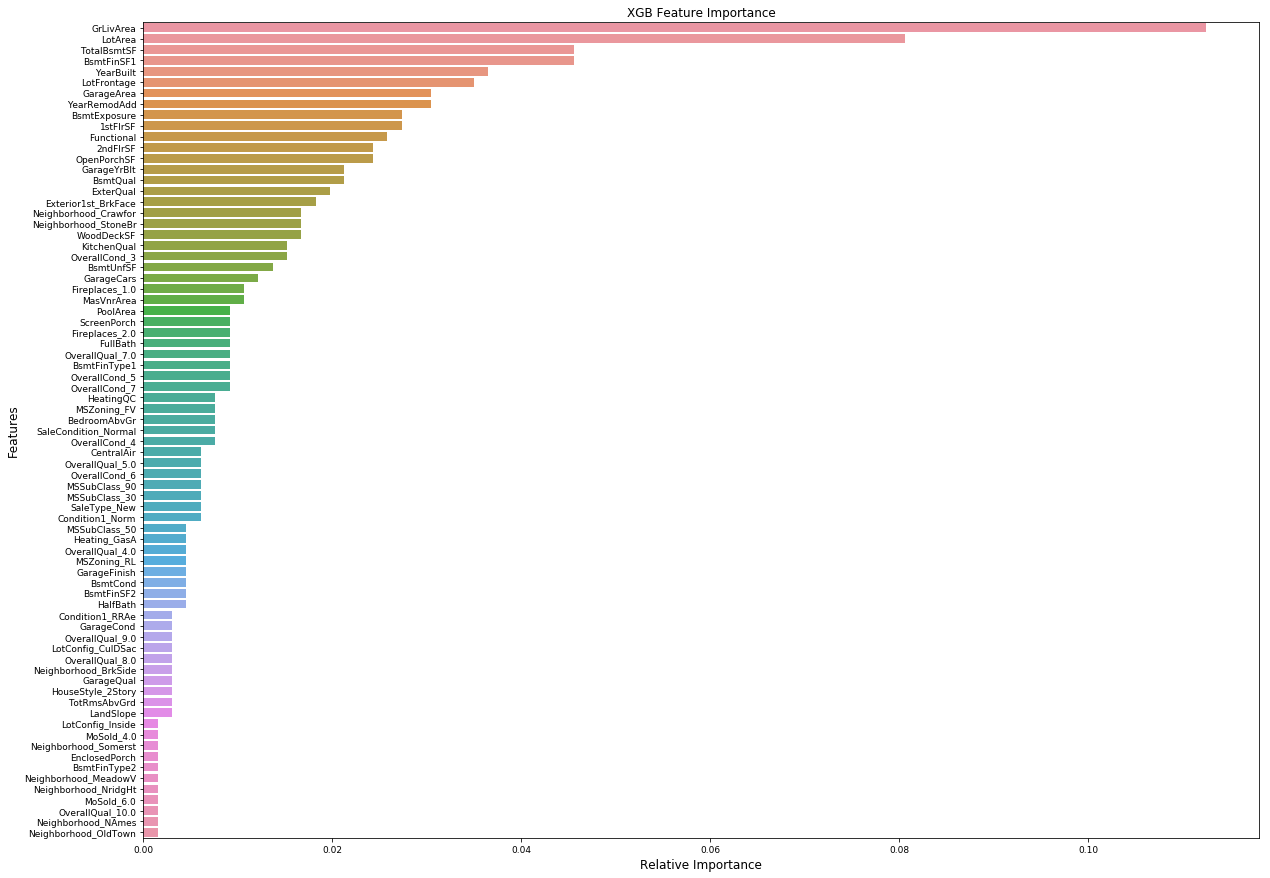

In [567]:
#Use XGBoost to find importance of features:
#Features must be numerical or boolean to test importance

xgb_x = pd.get_dummies(X_train, drop_first=True, dummy_na=True)
#xgb_x = X_train[["LotArea","OverallQual","YearBuilt","1stFlrSF","GrLivArea","FullBath"]]

#Using XGBoost:
xgb_model = XGBRegressor()
xgb_model.fit(xgb_x, y_train, verbose=False)

# Sort feature importances from model
indices = np.argsort(xgb_model.feature_importances_)[::-1]
indices = indices[:75]  #selecting top 75

# Visualise with barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=xgb_x.columns[indices], x = xgb_model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative Importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB Feature Importance");

### Adjust Features for Skewness

In [556]:
skewed_feats=X_train.select_dtypes(['float64','int64']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features:")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()

Skew in numerical features:


,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688


In [ ]:
#BoxCox for skewed features (MiscVal, PoolArea, LotArea)

# X_train['LotArea'] = np.log1p(X_train['LotArea'])
# X_train['MiscVal'] = np.log1p(X_train['MiscVal'])
# X_train['PoolArea'] = np.log1p(X_train['PoolArea'])
# X_train['3SsnPorch'] = np.log1p(X_train['3SsnPorch'])

Selected feature sets for analysis:

In [ ]:
# features1 = ["LotArea","YearBuilt"]

# features2 = ["LotArea","OverallQual","YearBuilt","1stFlrSF","GrLivArea","FullBath","GarageCars",\
#                 "MoSold","YrSold","Neighborhood","KitchenQual","Fireplaces","MasVnrArea","WoodDeckSF"]

# features3 = ["LotArea","OverallQual","YearBuilt","1stFlrSF","GrLivArea","FullBath","GarageArea",\
#             "MoSold","YrSold","Neighborhood","KitchenQual","Fireplaces","WoodDeckSF","YearBuilt",\
#             "WoodDeckSF","OpenPorchSF","ScreenPorch","SaleType","Functional"]


### Scale Data ??

Get dummy variables for categorical features:

In [574]:
X = X_train #<-------- choose feature set
X = pd.get_dummies(X,drop_first=True,dummy_na=False) #dummy_na=True creates NA columns for category features w/ NA

In [575]:
X = X
y = np.log1p(y_train)

In [577]:
X.head()

,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2,YrSold_3,YrSold_4,YrSold_5,YrSold_6,YrSold_7,YrSold_8,YrSold_9,YrSold_10,YrSold_11,YrSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,19.212182,3,2,2003,2003,196.0,2,2,3,2,1,6,706,1,0,150,856,4,1,856,854,0.0,1710,2,1,3,2,8,6,2003.0,2,2,548,2,2,2,0,61,0,0.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,19.712205,3,2,1976,1976,0.0,1,2,3,2,4,5,978,1,0,284,1262,4,1,1262,0,0.0,1262,2,0,3,1,6,6,1976.0,2,2,460,2,2,2,298,0,0,0.0,0,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,20.347241,2,2,2001,2002,162.0,2,2,3,2,2,6,486,1,0,434,920,4,1,920,866,0.0,1786,2,1,3,2,6,6,2001.0,2,2,608,2,2,2,0,42,0,0.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,19.691553,2,2,1915,1970,0.0,1,2,2,3,1,5,216,1,0,540,756,3,1,961,756,0.0,1717,1,0,3,2,7,6,1998.0,1,3,642,2,2,2,0,35,272,0.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,21.325160,2,2,2000,2000,350.0,2,2,3,2,3,6,655,1,0,490,1145,4,1,1145,1053,0.0,2198,2,1,4,2,9,6,2000.0,2,3,836,2,2,2,192,84,0,0.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [579]:
XX = X

In [580]:
from scipy.stats import skew
skewness = XX.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
XX[skewed_features] = np.log1p(XX[skewed_features])

225 skewed numerical features to log transform


In [582]:
XX.head()

,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,...,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2,YrSold_3,YrSold_4,YrSold_5,YrSold_6,YrSold_7,YrSold_8,YrSold_9,YrSold_10,YrSold_11,YrSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,3.006286,1.386294,1.098612,7.602900,7.602900,5.283204,1.098612,1.098612,3,1.098612,0.693147,6,6.561031,0.693147,0.0,5.017280,6.753438,1.609438,0.693147,6.753438,6.751101,0.0,7.444833,2,0.693147,3,2,2.197225,1.94591,7.602900,2,2,548,1.098612,1.098612,1.098612,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693147,0,0.0,0.0,1,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147,0.0
1,4.394449,3.030723,1.386294,1.098612,7.589336,7.589336,0.000000,0.693147,1.098612,3,1.098612,1.609438,5,6.886532,0.693147,0.0,5.652489,7.141245,1.609438,0.693147,7.141245,0.000000,0.0,7.141245,2,0.000000,3,1,1.945910,1.94591,7.589336,2,2,460,1.098612,1.098612,1.098612,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693147,1,0.0,0.0,1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147,0.0
2,4.234107,3.060922,1.098612,1.098612,7.601902,7.602401,5.093750,1.098612,1.098612,3,1.098612,1.098612,6,6.188264,0.693147,0.0,6.075346,6.825460,1.609438,0.693147,6.825460,6.765039,0.0,7.488294,2,0.693147,3,2,1.945910,1.94591,7.601902,2,2,608,1.098612,1.098612,1.098612,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693147,1,0.0,0.0,1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147,0.0
3,4.110874,3.029726,1.098612,1.098612,7.557995,7.586296,0.000000,0.693147,1.098612,2,1.386294,0.693147,5,5.379897,0.693147,0.0,6.293419,6.629363,1.386294,0.693147,6.869014,6.629363,0.0,7.448916,1,0.000000,3,2,2.079442,1.94591,7.600402,1,3,642,1.098612,1.098612,1.098612,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693147,1,0.0,0.0,0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.000000,0.0
4,4.442651,3.105714,1.098612,1.098612,7.601402,7.601402,5.860786,1.098612,1.098612,3,1.098612,1.386294,6,6.486161,0.693147,0.0,6.196444,7.044033,1.609438,0.693147,7.044033,6.960348,0.0,7.695758,2,0.693147,4,2,2.302585,1.94591,7.601402,2,3,836,1.098612,1.098612,1.098612,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0

In [ ]:
X.shape

In [ ]:
X_train.shape

***MACHINE LEARNING ALGORITHMS:***
---------------------------------

In [591]:
#a = pd.DataFrame(a)
a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,-0.079625,-0.118294,0.636348,0.21182,1.047116,0.879223,1.207635,1.099885,-0.191795,0.622665,0.145011,-0.551823,1.166596,0.781657,-0.23748,-0.355617,-0.339727,0.004474,0.845191,0.264006,-0.806494,1.182829,-0.13436,0.539563,0.793546,1.260813,0.163894,0.741127,0.953777,0.215104,0.249660,0.320685,0.313159,0.357973,0.273371,0.273686,0.283657,-0.945331,0.848459,-0.404567,-0.129074,-0.292987,-0.064278,-0.191759,-0.212512,-0.083103,-0.144943,-0.762460,-0.222881,-0.05245,...,-0.037062,-0.05245,-0.137361,-0.045408,-0.026198,0.306224,-0.895670,-0.292625,-0.05245,0.823280,-0.114907,-0.251907,-0.078811,-0.601119,-0.242536,5.199852,-0.280004,-0.327203,-0.403335,-0.458212,-0.437237,-0.302188,-0.212512,-0.253443,-0.239349,-0.205361,5.199852,-0.280004,-0.327203,-0.403335,-0.458212,-0.437237,-0.302188,-0.212512,-0.253443,-0.239349,-0.205361,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,-0.045408,0.388265,-0.05245,-0.091098,-0.117933,0.465863,-0.303537
1,0.558441,0.128825,0.636348,0.21182,0.165126,-0.422726,-0.805570,-0.665340,-0.191795,0.622665,0.145011,1.955524,0.691883,0.890540,-0.23748,-0.355617,0.002819,0.343336,0.845191,0.264006,0.428226,-0.868747,-0.13436,-0.380320,0.793546,-0.768222,0.163894,-0.770150,-0.223836,0.215104,0.241858,0.320685,0.313159,-0.056795,0.273371,0.273686,0.283657,1.251286,-1.071920,-0.404567,-0.129074,-0.292987,-0.064278,-0.191759,-0.212512,-0.083103,-0.144943,1.311545,-0.222881,-0.05245,...,-0.037062,-0.05245,-0.137361,-0.045408,-0.026198,0.306224,1.116482,-0.292625,-0.05245,0.823280,-0.114907,-0.251907,-0.078811,-0.601119,-0.242536,-0.192313,-0.280004,-0.327203,2.479326,-0.458212,-0.437237,-0.302188,-0.212512,-0.253443,-0.239349,-0.205361,-0.192313,-0.280004,-0.327203,2.479326,-0.458212,-0.437237,-0.302188,-0.212512,-0.253443,-0.239349,-0.205361,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,-0.045408,0.388265,-0.05245,-0.091098,-0.117933,0.465863,-0.303537
2,0.058871,0.434208,-0.847755,0.21182,0.982192,0.831316,1.135442,1.099885,-0.191795,0.622665,0.145011,0.557696,1.166596,0.656962,-0.23748,-0.355617,0.230852,0.067406,0.845191,0.264006,-0.577186,1.187064,-0.13436,0.671249,0.793546,1.260813,0.163894,0.741127,-0.223836,0.215104,0.249085,0.320685,0.313159,0.640770,0.273371,0.273686,0.283657,-0.945331,0.678188,-0.404567,-0.129074,-0.292987,-0.064278,-0.191759,-0.212512,-0.083103,-0.144943,-0.762460,-0.222881,-0.05245,...,-0.037062,-0.05245,-0.137361,-0.045408,-0.026198,0.306224,1.116482,-0.292625,-0.05245,0.823280,-0.114907,-0.251907,-0.078811,-0.601119,-0.242536,-0.192313,-0.280004,-0.327203,-0.403335,-0.458212,-0.437237,-0.302188,4.705620,-0.253443,-0.239349,-0.205361,-0.192313,-0.280004,-0.327203,-0.403335,-0.458212,-0.437237,-0.302188,4.705620,-0.253443,-0.239349,-0.205361,-0.05245,-0.037062,-0.078811,-0.058661,-0.058661,-0.299476,-0.045408,0.388265,-0.05245,-0.091098,-0.117933,0.465863,-0.303537
3,-0.325078,0.118737,-0.847755,0.21182,-1.872697,-0.714462,-0.805570,-0.665340,-0.191795,-0.654193,1.579786,-0.551823,0.691883,0.386556,-0.23748,-0.355617,0.348451,-0.103942,-0.017026,0.264006,-0.438516,1.145834,-0.13436,0.551934,-1.025620,-0.768222,0.163894,0.741127,0.401867,0.215104,0.248223,-0.800558,1.652119,0.801022,0.273371,0.273686,0.283657,-0.945331,0.595511,2.842190,-0.129074,-0.292987,-0.064278,-0.191759,-0.212512,-0.083103,-0.144943,-0.762460,-0.222881,-0.05245,...,-0.037062,-0.05245,-0.137361,-0.045408,-0.026198,0.306224,1.116482,-0.292625,-0.05245,-1.214653,-0.114907,-0.251907,-0.078811,1.663563,-0.242536,5.199852,-0.280004,-0.327203,-0.403335,-0.458212,-0.437237,-0.302188,-0.212512,-0.253443,-0.239349,-0.205361,5.199852,-0.280004,-0.327203,-0.

In [592]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LogisticRegression, ElasticNetCV, Ridge
from sklearn import tree
import sklearn.model_selection as ms
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [593]:
X = XX

In [ ]:
# #Grid Search for RandomForest
# RFR_grid_param = {'n_estimators': [100], 'max_features': ['auto'], 'max_depth': [None], \
#                   'min_samples_split': [5], 'min_samples_leaf': [2]}

# para_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=RFR_grid_param, \
#                            scoring='neg_mean_squared_error', cv=10, return_train_score=True)
# para_search = para_search.fit(X, y)
# print(para_search.best_score_)
# print(para_search.best_params_)
# para_search.best_estimator_

In [601]:
#Grid Search for Ridge

RR_grid_param = {'alpha': np.linspace(1,2,num=20)}

para_search = GridSearchCV(estimator=Ridge(), param_grid=RR_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(X, y)
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_

-0.0137492664858
{'alpha': 1.2105263157894737}


Ridge(alpha=1.2105263157894737, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [612]:
#Grid Search for Kernel Ridge

KR_grid_param = {'alpha': np.linspace(.001,.002, num=3), 'coef0': [100], \
                 'degree': [1.5], 'gamma': [None], 'kernel': ['polynomial']}

para_search = GridSearchCV(estimator=KernelRidge(), param_grid=KR_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(X, y)
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_

-0.426207911587
{'alpha': 0.0015, 'coef0': 100, 'degree': 1.5, 'gamma': None, 'kernel': 'polynomial'}


KernelRidge(alpha=0.0015, coef0=100, degree=1.5, gamma=None,
      kernel='polynomial', kernel_params=None)

In [606]:
LASS_grid_param = {'alpha':np.linspace(0.001,0.01,num=20), 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 'precompute': [False], 
                    'max_iter': [300],'tol': [0.01], 'selection': ['random'], 'random_state': [None]}


para_search = GridSearchCV(estimator=Lasso(), param_grid=LASS_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(X, y)
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_


-0.0157287289005
{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 300, 'normalize': False, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.01}


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=300,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='random', tol=0.01, warm_start=False)

  LR:  RMSE: 0.1213 (0.0153)  R^2: 0.9067 (0.0153)
TREE:  RMSE: 0.2103 (0.0301)  R^2: 0.7191 (0.0393)
 KRR:  RMSE: 14.5729 (50.3791)  R^2: -1.3431 (2.6636)
RIDG:  RMSE: 0.1165 (0.0157)  R^2: 0.9137 (0.0149)
LASS:  RMSE: 0.1245 (0.0133)  R^2: 0.9011 (0.0108)


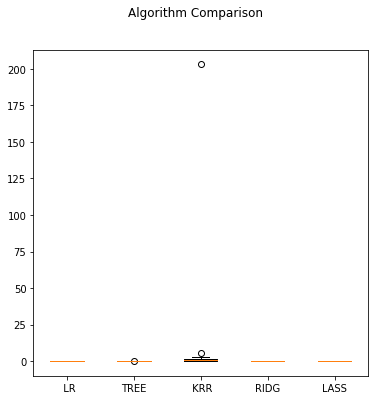

In [613]:
#Linear Regression:
linear = linear_model.LinearRegression()
#Ridge Regression:
ridg = linear_model.Ridge(alpha=1.21)
#Lasso Regression
lass = linear_model.Lasso(alpha=0.001)
#Kernel Ridge Regression:
krr = KernelRidge(alpha=0.0015, coef0=100, degree=1.5, gamma=None,
      kernel='polynomial', kernel_params=None)

#ElasticNet Model:
enet = linear_model.ElasticNet(alpha = .001, l1_ratio = 0.001) #('ENET', enet),
#Decision Tree Regression:
dtree = tree.DecisionTreeRegressor()
#Random Forest:  ('RFOR',rfor)
rfor = RandomForestRegressor(max_depth=10)

models = [('  LR', linear),('TREE', dtree),(' KRR',krr),('RIDG',ridg),('LASS',lass)]

results = []
names = []
for name, model in models:
    r_sq = ms.cross_val_score(model, X, y, cv=10, scoring='r2')
    rmse_score = np.sqrt((abs(ms.cross_val_score(model,X, y, cv=15, scoring='neg_mean_squared_error'))))
    results.append(rmse_score)
    names.append(name)
    msg = "%s:  RMSE: %.4f (%.4f)  R^2: %.4f (%.4f)" %(name,rmse_score.mean(),rmse_score.std(),r_sq.mean(),r_sq.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(6,6)
plt.show()


## PCA Analysis

In [614]:
from sklearn.decomposition import PCA
X=X
#X = pd.get_dummies(X,drop_first=True,dummy_na=False) #dummy_na=True creates NA columns for category features w/ NA
pca = PCA().fit(X)


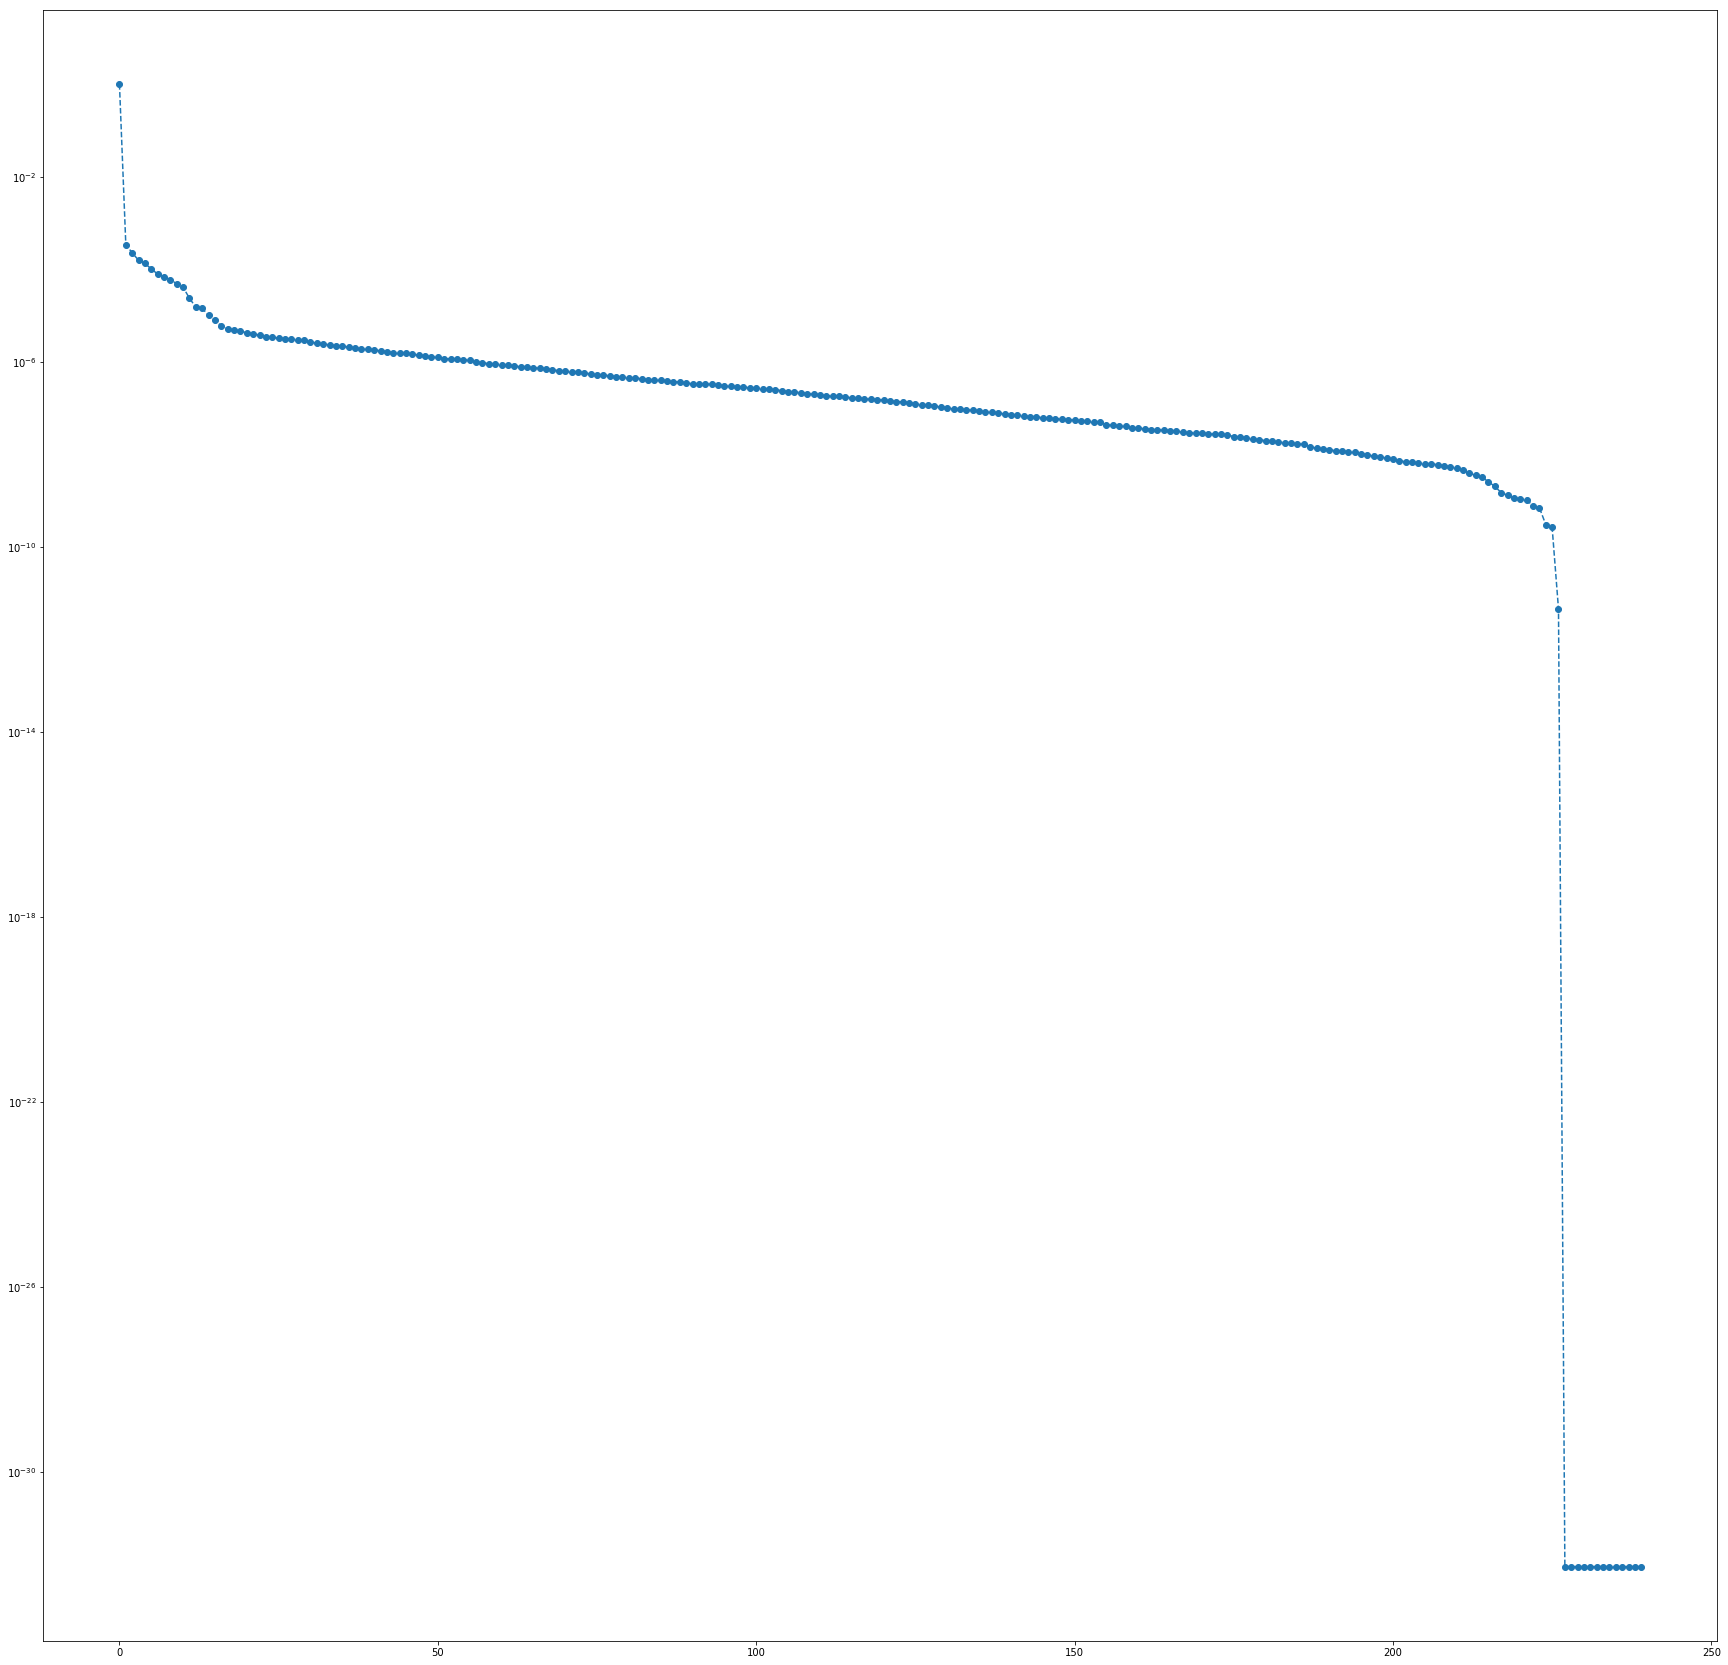

In [615]:
plt.semilogy(pca.explained_variance_ratio_, '--o')


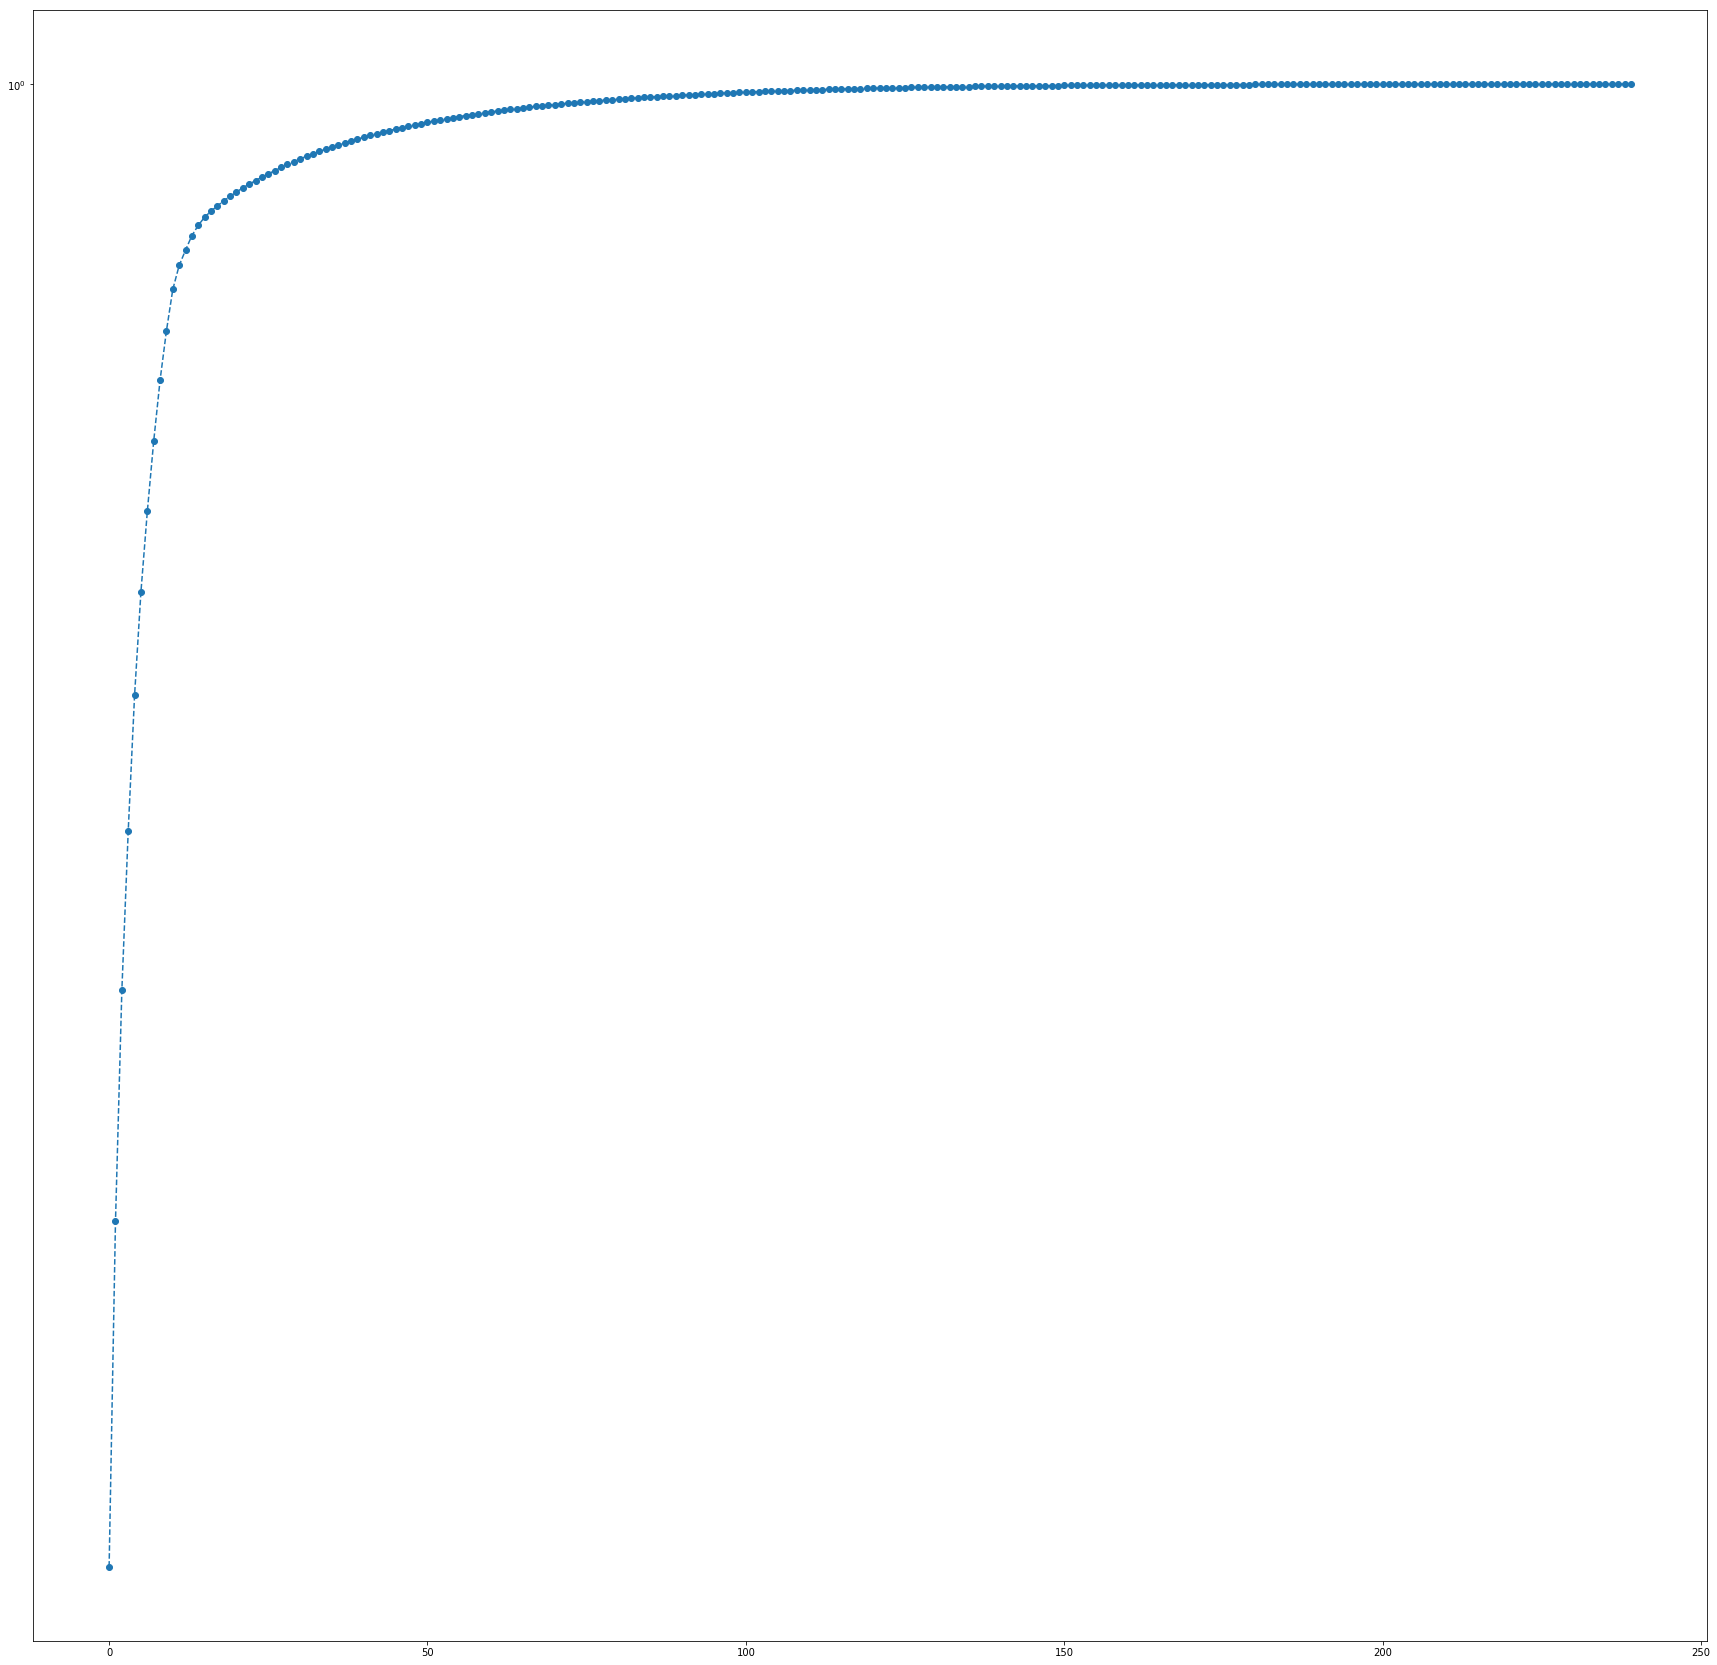

In [616]:
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')


In [617]:
X.shape

(1458, 240)

In [618]:
pca.explained_variance_ratio_.cumsum()[50]


0.99996269312615693

In [619]:
pca = PCA(n_components=50).fit(X)


In [620]:
pca.transform(X).shape
p_x = pca.transform(X)

In [622]:
#Grid Search for Ridge

RR_grid_param = {'alpha': range(1,100)}

para_search = GridSearchCV(estimator=Ridge(), param_grid=RR_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(p_x, y)
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_

-0.0230352505406
{'alpha': 7}


Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [635]:
#Grid Search for Kernel Ridge

KR_grid_param = {'alpha': np.linspace(.07,.2,num=5), 'coef0': [100], \
                 'degree': [1], 'gamma': [None], 'kernel': ['polynomial']}

para_search = GridSearchCV(estimator=KernelRidge(), param_grid=KR_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(p_x, y)
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_

-0.023035249579
{'alpha': 0.13500000000000001, 'coef0': 100, 'degree': 1, 'gamma': None, 'kernel': 'polynomial'}


KernelRidge(alpha=0.13500000000000001, coef0=100, degree=1, gamma=None,
      kernel='polynomial', kernel_params=None)

In [636]:
#Grid Search for ElasticNet:

EN_grid_param = {'alpha': [.01, .05, .1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], 'copy_X': [True], \
              'l1_ratio': [.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.75, 0.9, 1], 'fit_intercept': [True], \
              'normalize': [False],'precompute': [False], 'max_iter': [5000], 'tol': [0.0001], \
              'selection': ['random'],'random_state': [None]}

para_search = GridSearchCV(estimator=ElasticNet(), param_grid=EN_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(p_x, y)
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_

-0.0230514704194
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 5000, 'normalize': False, 'precompute': False, 'random_state': None, 'selection': 'random', 'tol': 0.0001}


ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.01,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False)

In [643]:
#Grid Search for Random Forest

RFR_grid_param = {'n_estimators': [200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 6, 7, 8], \
                  'criterion': ['mse']}


para_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=RFR_grid_param, scoring='neg_mean_squared_error', cv=10, \
                           return_train_score=True)
para_search = para_search.fit(p_x, y['SalePrice'])
print(para_search.best_score_)
print(para_search.best_params_)
para_search.best_estimator_

-0.0421095194471
{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

  LR:  RMSE: 0.1512 (0.0153)  R^2: 0.8544 (0.0157)
TREE:  RMSE: 0.2955 (0.0284)  R^2: 0.4340 (0.0648)
RIDG:  RMSE: 0.1510 (0.0153)  R^2: 0.8547 (0.0155)
ENET:  RMSE: 0.1510 (0.0153)  R^2: 0.8547 (0.0154)
LASS:  RMSE: 0.1507 (0.0152)  R^2: 0.8551 (0.0157)
 KRR:  RMSE: 0.1510 (0.0204)  R^2: 0.8515 (0.0220)
RFOR:  RMSE: 0.2047 (0.0209)  R^2: 0.7349 (0.0316)


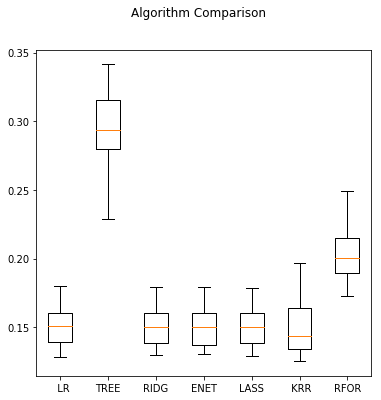

In [649]:
X=p_x
# y=np.log(y_train)

#ElasticNet Model:
enet = linear_model.ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.01,\
      max_iter=5000, normalize=False, positive=False, precompute=False,\
      random_state=None, selection='random', tol=0.0001, warm_start=False)
#Linear Regression:
linear = linear_model.LinearRegression()
#Decision Tree Regression:
dtree = tree.DecisionTreeRegressor()
#Kernel Ridge Regression:
krr = KernelRidge(alpha=0.135, coef0=2.5, degree=2, gamma=None, kernel='polynomial', kernel_params=None)
#Random Forest:  ('RFOR',rfor)
rfor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,\
           max_features='auto', max_leaf_nodes=None,\
           min_impurity_decrease=0.0, min_impurity_split=None,\
           min_samples_leaf=1, min_samples_split=2,\
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,\
           oob_score=False, random_state=None, verbose=0, warm_start=False)
#Ridge Regression:
ridg = linear_model.Ridge(alpha=7)
#Lasso Regression
lass = linear_model.Lasso(alpha=0.00035)

models = [('  LR', linear),('TREE', dtree),('RIDG',ridg),('ENET',enet),('LASS',lass),(' KRR',krr),('RFOR',rfor)]

results = []
names = []
for name, model in models:
    r_sq = ms.cross_val_score(model, X, y['SalePrice'], cv=10, scoring='r2')
    rmse_score = np.sqrt((abs(ms.cross_val_score(model,X, y['SalePrice'], cv=15, scoring='neg_mean_squared_error'))))
    results.append(rmse_score)
    names.append(name)
    msg = "%s:  RMSE: %.4f (%.4f)  R^2: %.4f (%.4f)" %(name,rmse_score.mean(),rmse_score.std(),r_sq.mean(),r_sq.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(6,6)
plt.show()


In [646]:
y.shape

(1458, 1)

In [647]:
y['SalePrice'].shape

(1458,)